In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
#!ls "mpyfit"
#!cd "My Drive"
#%cd "MyDrive"
#%cd "autosg1"
#%cd "mpyfit"
! ls

drive  mpyfit  sample_data


In [3]:
%cd 'drive/MyDrive/MIT 2021-2022/Vanderburg Meetings/auto_sg1'

/content/drive/.shortcut-targets-by-id/1O3dbIrDyD5p7PHzVJ7e5X1Y55nAAhA45/MIT 2021-2022/Vanderburg Meetings/auto_sg1


In [5]:
!git clone https://github.com/zdebeurs/mpyfit #https://github.com/evertrol/mpyfit

Cloning into 'mpyfit'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 54 (delta 1), reused 18 (delta 1), pack-reused 34
Unpacking objects: 100% (54/54), done.


In [6]:
%cd 'mpyfit'

/content/drive/.shortcut-targets-by-id/1O3dbIrDyD5p7PHzVJ7e5X1Y55nAAhA45/MIT 2021-2022/Vanderburg Meetings/auto_sg1/mpyfit


In [7]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing mpyfit.egg-info/PKG-INFO
writing dependency_links to mpyfit.egg-info/dependency_links.txt
writing top-level names to mpyfit.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mpyfit.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mpyfit
copying mpyfit/__init__.py -> build/lib.linux-x86_64-3.7/mpyfit
copying mpyfit/mpfit.py -> build/lib.linux-x86_64-3.7/mpyfit
running build_ext
building 'mpyfit.mpfit' extension
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/mpyfit
creating build/temp.linux-x86_64-3.7/mpyfit/cmpfit
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fs

In [8]:
!ls 'mpyfit/cmpfit'

DISCLAIMER  mpfit.c  mpfit.h  mpfit-orig.c  README


In [9]:
%cd ..

/content/drive/.shortcut-targets-by-id/1O3dbIrDyD5p7PHzVJ7e5X1Y55nAAhA45/MIT 2021-2022/Vanderburg Meetings/auto_sg1


In [10]:
import numpy
import matplotlib.pylab as plt
import mpyfit

In [11]:
# Define the actual function
def func(x, p):
    return p[0] + p[1] * numpy.sin(p[2]*x - p[3])

In [25]:
# A simple minimization function:
def least(p, args):
    x, y = args
    return func(x, p) - y

In [32]:
# Generate data
p = [1, 1.5, 0.2, 0.5]
x = numpy.linspace(-20, 10, 30)
y = func(x, p)
# Add some noise
y += numpy.random.normal(0, 0.05, y.shape)

# choose starting values for parameter you are trying to fit
pstart = [1, 1, 0.1, 1]

# choose step sizes for those parameters
parinfo = [{'fixed': False, 'step': 1e-3},
           {'fixed': False, 'step': 1e-2},
           {'fixed': False, 'step': 1e-3},
           {'fixed': False, 'step': 1e-2}]

pfit, results = mpyfit.fit(least, pstart, (x, y), parinfo)

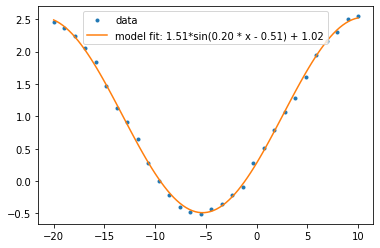

In [33]:
# plot the resulting fit

# generate closely spaced x_values with the same xmin and xmax as the simulated data
x_closely_spaced = numpy.linspace(-20, 10, 100)

# plot simulated data
plt.plot(x, y, ".", label="data")

# plot your fit
plt.plot(x_closely_spaced, func(x_closely_spaced, pfit), 
         label="model fit: %.2f*sin(%.2f * x - %.2f) + %.2f"%(pfit[1], pfit[2], pfit[3], pfit[0]))
plt.legend()

In [28]:
# print your fit
print([round(p, 1) for p in pfit]) 

[1.0, 1.5, 0.2, 0.5]


In [29]:
pfit

array([1.00696268, 1.50123623, 0.19843201, 0.49962651])

In [15]:
results

{'bestnorm': 0.09433366068040017,
 'covariances': array([[ 0.12980767,  0.04157201, -0.01396688,  0.07406656],
        [ 0.04157201,  0.0844801 , -0.00621681,  0.03309627],
        [-0.01396688, -0.00621681,  0.00202262, -0.01073539],
        [ 0.07406656,  0.03309627, -0.01073539,  0.08793013]]),
 'nfev': 46,
 'nfree': 4,
 'nfunc': 30,
 'niter': 9,
 'npar': 4,
 'npegged': 0,
 'orignorm': 29.16473718379152,
 'parerrors': array([0.36028831, 0.29065461, 0.04497355, 0.29653015]),
 'residuals': array([-0.01797025, -0.00257036, -0.01901898,  0.10851129,  0.04420379,
        -0.01744647, -0.09040562, -0.06189889,  0.10639634, -0.02166886,
        -0.05607953, -0.00158336,  0.02685504,  0.03851973, -0.08142864,
         0.06078177,  0.0107633 ,  0.04318177,  0.0105323 , -0.02051877,
        -0.07843436,  0.0716474 , -0.07928123,  0.02573372, -0.00744404,
        -0.00479006,  0.07526123, -0.07922912,  0.06877844, -0.05139757]),
 'status': (4, 'Convergence in orthogonality')}